#### The following questions will be investigated:
* 1. Has crime been increasing in LA, do trends vary by area, victim age, ethnicity, or victim sex?
* 2. What month has the most incidents of crime, least incidents, how might this vary by area, and victim demographics?
* 3. What day of the week has the most incidents of crime, least incidents, how might this vary by area and victim demographics?
* 4. Are certain crimes more prevelent during certain months, days of the week, or time of day?
* 5. Are there certain times of the day crimes are more likely to occurr, how might this vary depending on the crime?
* 6. Are victims of a certain age and or demographic more likely to be a victim of a crime?

In [1]:
# Importing the Python libraries that will be used for this analysis
# Load the Python Libraries 
import numpy as np
import pandas as pd
import seaborn as sbn 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing the cleaned and transformed dataset 
la_crime = pd.read_csv('la_crime_v3.csv')

In [3]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850659 entries, 0 to 850658
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date_occurred    850659 non-null  object 
 1   time_occurred    850659 non-null  int64  
 2   area             850659 non-null  int64  
 3   area_name        850659 non-null  object 
 4   crime_code       850659 non-null  int64  
 5   crime_code_desc  850659 non-null  object 
 6   victim_age       850659 non-null  int64  
 7   ethnicity        850659 non-null  object 
 8   premis_code      850659 non-null  int64  
 9   status_desc      850659 non-null  object 
 10  location         850659 non-null  object 
 11  latitude         850659 non-null  float64
 12  longitude        850659 non-null  float64
 13  month_name       850659 non-null  object 
 14  day_of_week      850659 non-null  object 
 15  age_bracket      850659 non-null  object 
 16  time_period      850659 non-null  obje

In [4]:
la_crime['age_bracket'].value_counts()

age_bracket
20-29    231982
30-39    222257
40-49    145409
50-59    108099
60-69     53908
45249     51471
70-79     23794
80-89      5883
0-9        4906
90-99      2950
Name: count, dtype: int64

In [5]:
# Replace 45249 with 10-19 for the age_bracket column
la_crime['age_bracket'] = la_crime['age_bracket'].replace('45249', '10-19')

In [6]:
la_crime['age_bracket'].value_counts()

age_bracket
20-29    231982
30-39    222257
40-49    145409
50-59    108099
60-69     53908
10-19     51471
70-79     23794
80-89      5883
0-9        4906
90-99      2950
Name: count, dtype: int64

In [7]:
# Change the date_occured column from an string to a datetime value
la_crime['date_occurred'] = pd.to_datetime(la_crime['date_occurred'], format='%m/%d/%Y')
la_crime['date_occurred'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 850659 entries, 0 to 850658
Series name: date_occurred
Non-Null Count   Dtype         
--------------   -----         
850659 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.5 MB


### 1. Has crime been increasing in LA, do trends vary by region, victim age, ethnicity, or victim sex? 
* Insights gained from this analyis can help in the motivation to create and or strengthen current crime prevention programs.

In [8]:
# Set the date_occurred column as the index
la_crime.set_index('date_occurred', inplace=True)

In [9]:
# Create a DataFrame where the dates are filtered exclude only the days after 11/30/2023 
# 
la_crime_filtered = la_crime[la_crime.index <= '2023-11-30']

In [10]:
# Grouping by the date and then counting the occurrences
crime_trend = la_crime_filtered.resample('M').size()

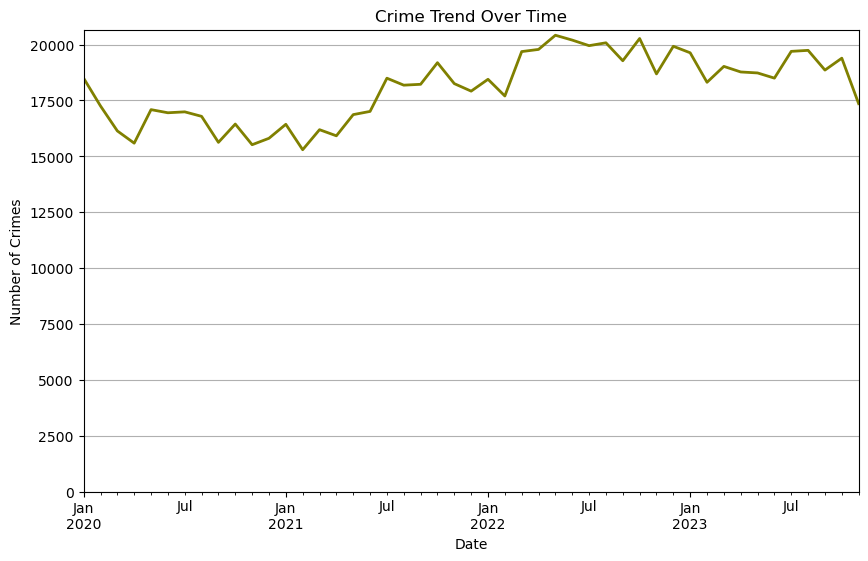

In [11]:
# Creating the time series plot

plt.figure(figsize=(10, 6))
crime_trend.plot(linewidth=2, color = 'olive')
plt.title('Crime Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(0)
plt.grid(axis = 'y')
plt.show()

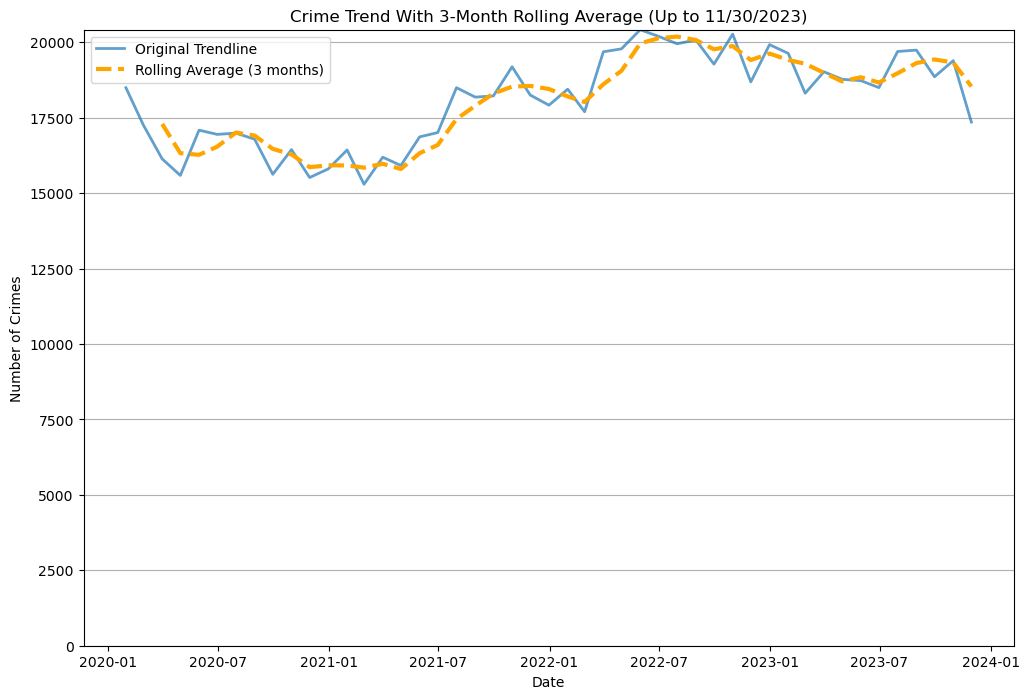

In [12]:
# Create a rolling average time series plot to better visualize crime trends

# Calculate the rolling average with a window size of 3 months
rolling_avg = la_crime_filtered.resample('M').size().rolling(window=3).mean()

# Find the maximum value for setting the y-axis
max_value = max(la_crime_filtered.resample('M').size().max(), rolling_avg.max())

# Create a time series plot with the original trendline and the rolling average
plt.figure(figsize=(12, 8))
plt.plot(la_crime_filtered.resample('M').size(), label='Original Trendline', linewidth=2, alpha=0.7)
plt.plot(rolling_avg, label='Rolling Average (3 months)', linewidth=3, linestyle='--', color='orange')

# Set the y-axis to start from zero
plt.ylim(0, max_value)

# Display only horizontal gridlines
plt.grid(axis='y')

plt.title('Crime Trend With 3-Month Rolling Average (Up to 11/30/2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()
 

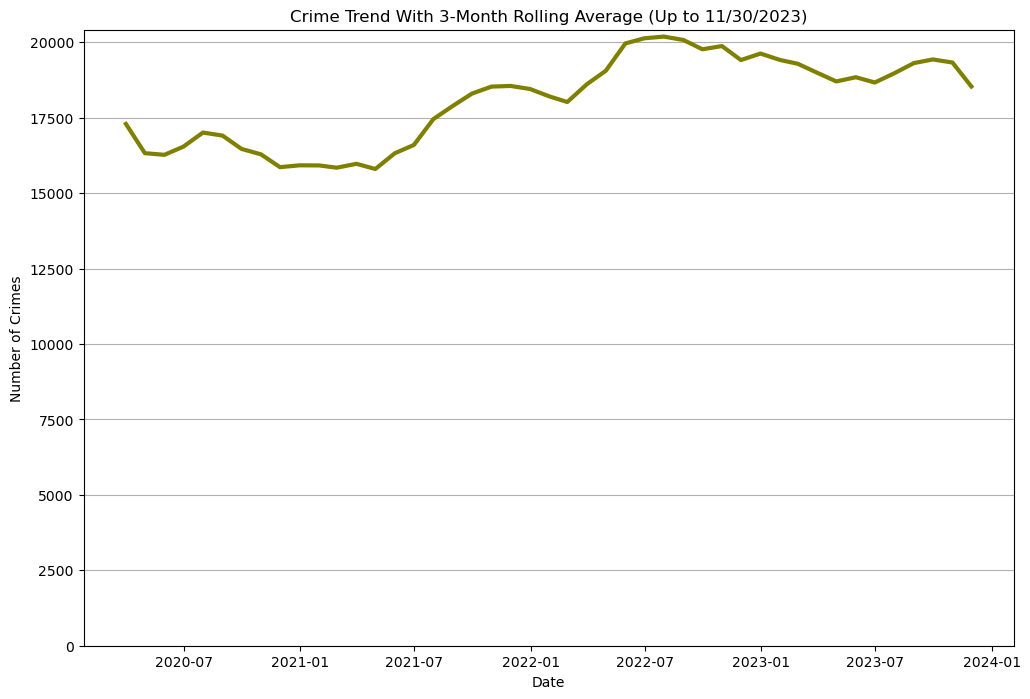

In [13]:
# Without the original trendline
plt.figure(figsize=(12, 8))
plt.plot(rolling_avg, label='Rolling Average (3 months)', linewidth=3, color='olive')

# Set the y-axis to start from zero
plt.ylim(0, max_value)

# Display only horizontal gridlines
plt.grid(axis='y')

plt.title('Crime Trend With 3-Month Rolling Average (Up to 11/30/2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

* Create subsets of the dataframe for each gender (Male and Female)

In [14]:
# Female
la_crime_filtered_female = la_crime_filtered[la_crime_filtered['gender'] == 'Female'] 
la_crime_filtered_female['gender'].unique()

array(['Female'], dtype=object)

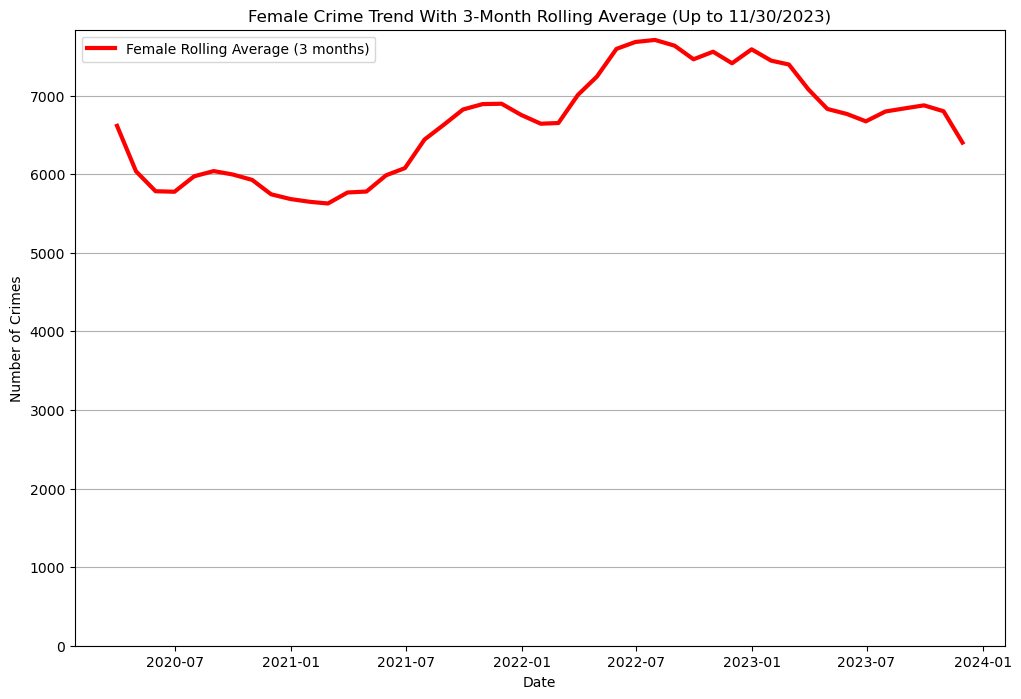

In [15]:
# Follow the same steps as above when creating the overall time series plot

# Calculate the rolling average with a window size of 3 months
rolling_avg_female = la_crime_filtered_female.resample('M').size().rolling(window=3).mean()

# Find the maximum value for setting the y-axis
max_value_female = max(la_crime_filtered_female.resample('M').size().max(), rolling_avg_female.max())

# Create the time series plot
plt.figure(figsize=(12, 8))
plt.plot(rolling_avg_female, label='Female Rolling Average (3 months)', linewidth=3, color='red')

# Set the y-axis to start from zero
plt.ylim(0, max_value_female)

# Display only horizontal gridlines
plt.grid(axis='y')

plt.title('Female Crime Trend With 3-Month Rolling Average (Up to 11/30/2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

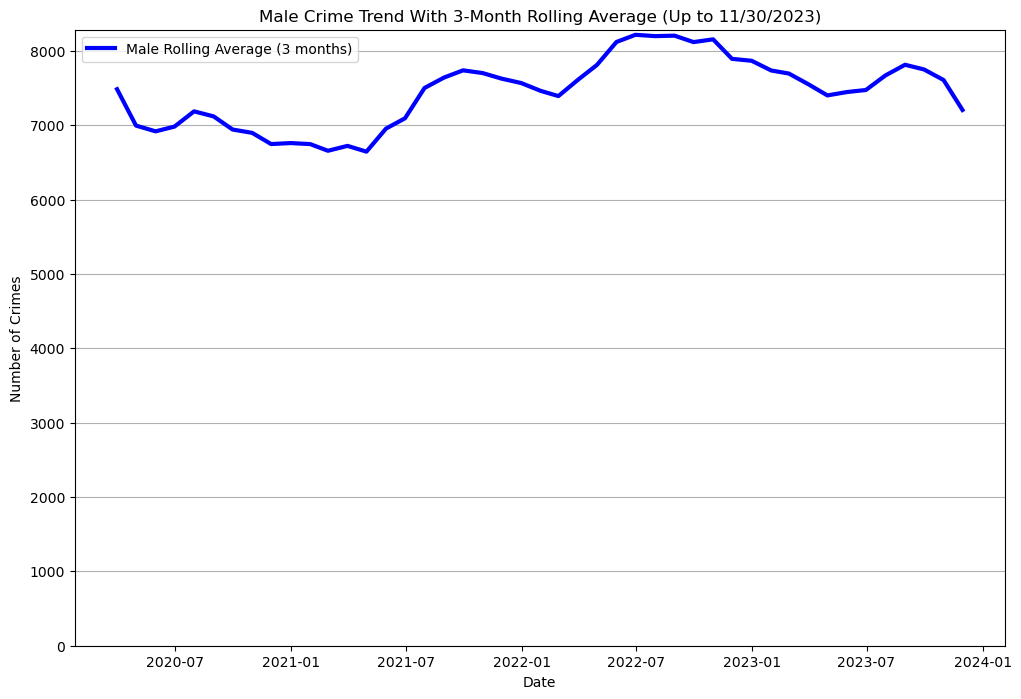

In [16]:
# Create the Male time series plot following the same steps above
la_crime_filtered_male = la_crime_filtered[la_crime_filtered['gender'] == 'Male'] 

# Calculate the rolling average with a window size of 3 months
rolling_avg_male = la_crime_filtered_male.resample('M').size().rolling(window=3).mean()
# Find the maximum value for setting the y-axis
max_value_male = max(la_crime_filtered_male.resample('M').size().max(), rolling_avg_male.max())

# Create the time series plot
plt.figure(figsize=(12, 8))
plt.plot(rolling_avg_male, label='Male Rolling Average (3 months)', linewidth=3, color='blue')

# Set the y-axis to start from zero
plt.ylim(0, max_value_male)

# Display only horizontal gridlines
plt.grid(axis='y')

plt.title('Male Crime Trend With 3-Month Rolling Average (Up to 11/30/2023)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

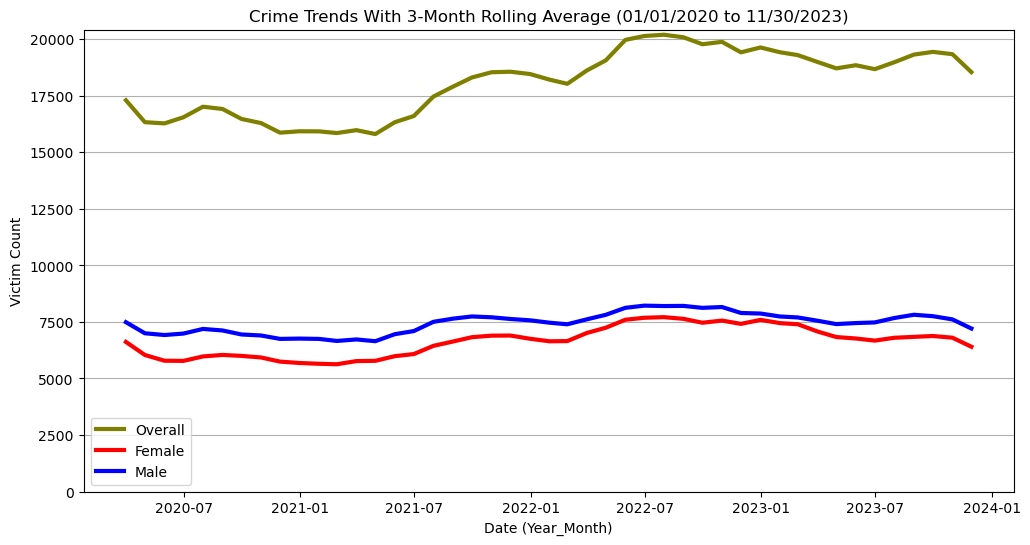

In [17]:
# Create a time series plot combining the overall, female, and male trends
plt.figure(figsize = (12, 6))
plt.plot(rolling_avg, label='Overall', linewidth=3, color='olive')
plt.plot(rolling_avg_female, label='Female', linewidth=3, color='red')
plt.plot(rolling_avg_male, label='Male', linewidth=3, color='blue')

# Set the y-axis to start from zero
plt.ylim(0, max_value)

# Display only horizontal gridlines
plt.grid(axis='y')

plt.title('Crime Trends With 3-Month Rolling Average (01/01/2020 to 11/30/2023)')
plt.xlabel('Date (Year_Month)')
plt.ylabel('Victim Count')
plt.legend()
plt.show()

In [18]:
# Create a function to reduce redundancy of rewriting code for creating the other time series charts
def time_series_plotter(data, column, category):
    
    data_filtered = data[data[column] == category]
    
    rolling_avg = data_filtered.resample('M').size().rolling(window = 3).mean()
    
    return rolling_avg
    

In [19]:
# Create a list of all the unique area names
la_crime_filtered['area_name'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Hollywood', 'Newton', 'Topanga', 'Foothill',
       'Olympic'], dtype=object)

In [20]:
# Find the regions with the top 5 highest crime rates and create time a time series plot that compares each area
la_crime_filtered.groupby('area_name').size().nlargest(5)

area_name
Central        57350
77th Street    53403
Pacific        49619
Southwest      47713
Hollywood      44626
dtype: int64

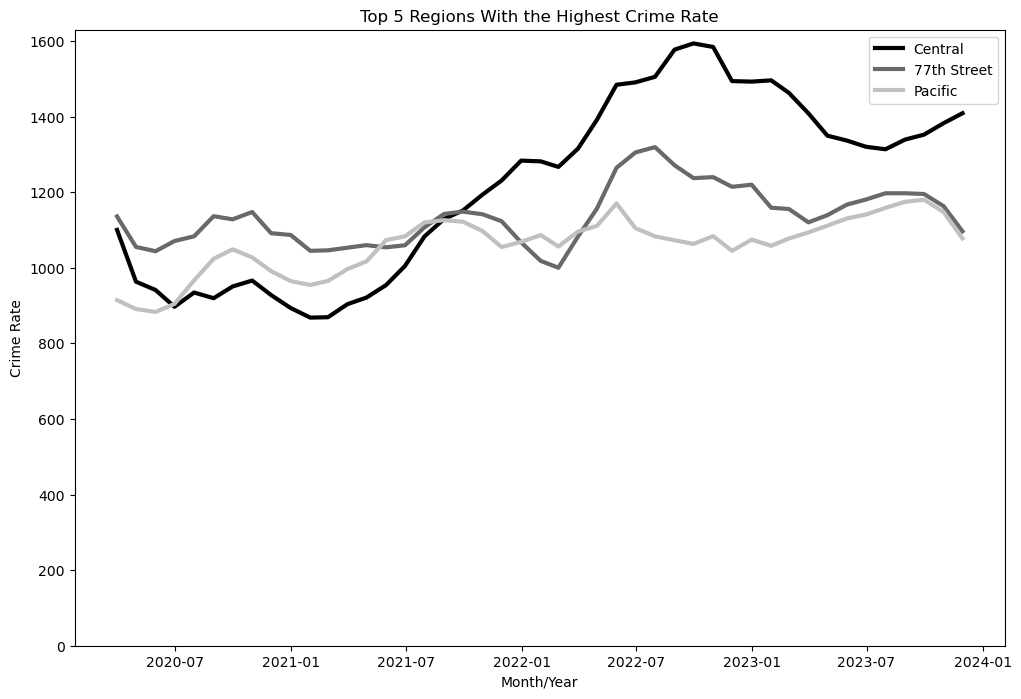

In [21]:
# Create the time series variables using time_series_plotter function and then plot them on a single chart
# 1. Creating the time series variables

central = time_series_plotter(la_crime_filtered, 'area_name', 'Central')
seventy_seventh_street = time_series_plotter(la_crime_filtered, 'area_name', '77th Street')
pacific = time_series_plotter(la_crime_filtered, 'area_name', 'Pacific')
southwest = time_series_plotter(la_crime_filtered, 'area_name', 'Southwest')
hollywood = time_series_plotter(la_crime_filtered, 'area_name', 'Hollywood')

plt.figure(figsize = (12, 8))

plt.plot(central, label = 'Central', linewidth = 3, color = 'black')
plt.plot(seventy_seventh_street, label = '77th Street', linewidth = 3, color = 'dimgrey')
plt.plot(pacific, label = 'Pacific', linewidth = 3, color = 'silver')
# plt.plot(southwest, label = 'Southwest', linewidth = 3, color = 'orange')
# plt.plot(hollywood, label = 'Hollywood', linewidth = 3, color = 'lightgrey')
plt.legend()
plt.ylim(0)
plt.title('Top 5 Regions With the Highest Crime Rate')
plt.xlabel('Month/Year')
plt.ylabel('Crime Rate')
plt.show()

In [22]:
# Find age groups with the highest victim count
la_crime_filtered.groupby('age_bracket').size().nlargest(5)

age_bracket
20-29    231488
30-39    221855
40-49    145175
50-59    107939
60-69     53808
dtype: int64

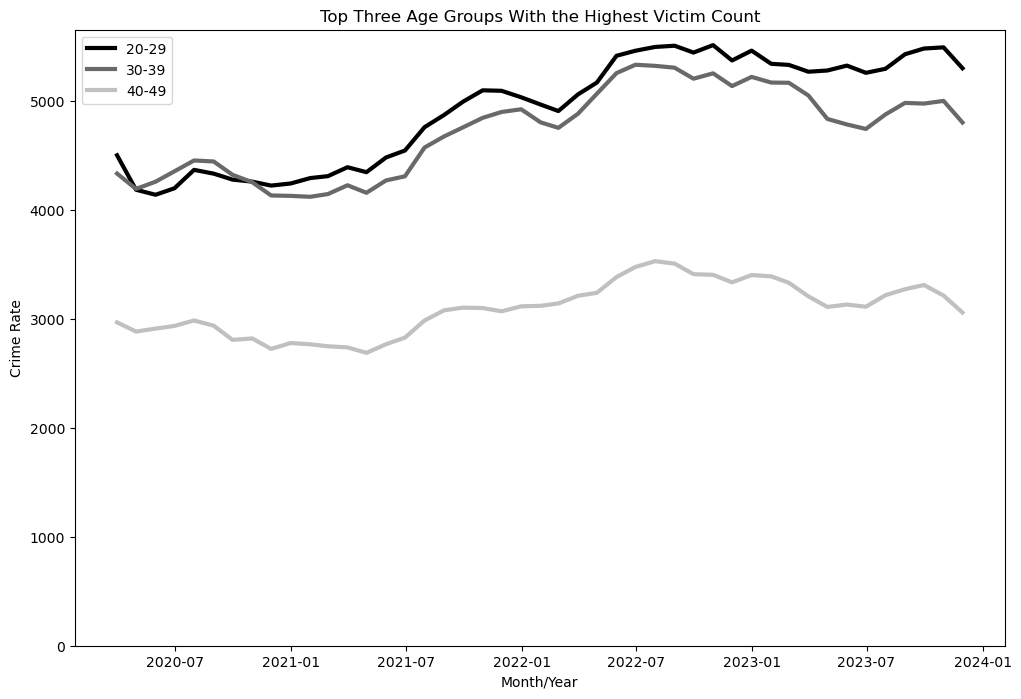

In [23]:
# Create a time series plot reflecting the age groups with the highest victim count
twenties_bracket = time_series_plotter(la_crime_filtered, 'age_bracket', '20-29')
thirties_bracket = time_series_plotter(la_crime_filtered, 'age_bracket', '30-39')
fourties_bracket = time_series_plotter(la_crime_filtered, 'age_bracket', '40-49')

plt.figure(figsize = (12, 8))
plt.plot(twenties_bracket, label = '20-29', linewidth = 3, color = 'black')
plt.plot(thirties_bracket, label = '30-39', linewidth = 3, color = 'dimgrey')
plt.plot(fourties_bracket, label = '40-49', linewidth = 3, color = 'silver')

plt.legend()
plt.ylim(0)
plt.title('Top Three Age Groups With the Highest Victim Count')
plt.ylabel('Crime Rate')
plt.xlabel('Month/Year')

plt.show()

In [24]:
# Find ethnicities with the highest crime victim count
la_crime_filtered.groupby('ethnicity').size().nlargest(5)

ethnicity
Hispanic/Latin/Mexican    259926
Unknown                   194781
White                     172792
Black                     120379
Other                      67243
dtype: int64

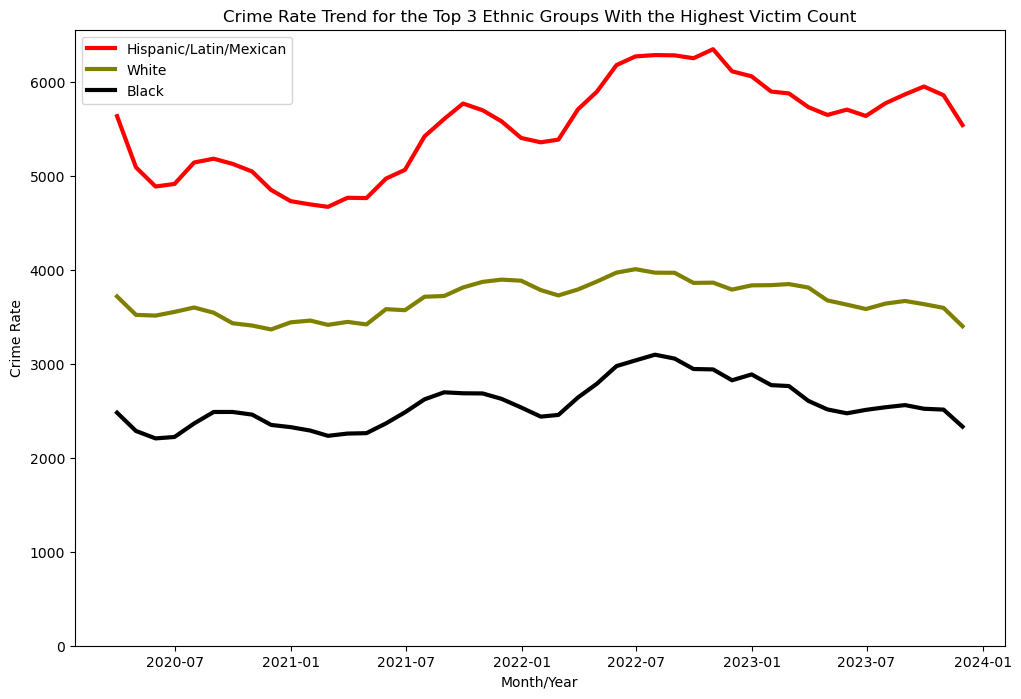

In [25]:
# Follow same steps as above for creating time series plots for the Hispanic/Latin/Mexican, White, and Black ethnicities 
spanish = time_series_plotter(la_crime_filtered, 'ethnicity', 'Hispanic/Latin/Mexican')
white = time_series_plotter(la_crime_filtered, 'ethnicity', 'White')
black = time_series_plotter(la_crime_filtered, 'ethnicity', 'Black')

plt.figure(figsize = (12, 8))
plt.plot(spanish, label = 'Hispanic/Latin/Mexican', linewidth = 3, color = 'red')
plt.plot(white, label = 'White', linewidth = 3, color = 'olive')
plt.plot(black, label = 'Black', linewidth = 3, color = 'black')

plt.legend()
plt.ylim(0)
plt.title('Crime Rate Trend for the Top 3 Ethnic Groups With the Highest Victim Count')
plt.ylabel('Crime Rate')
plt.xlabel('Month/Year')
plt.show()

In [26]:
# Follow the same steps as above to find the five most common crimes
la_crime_filtered.groupby('crime_code').size().nlargest(15)

crime_code
510    91210
624    67472
354    53359
330    52450
310    51836
740    51681
230    48763
440    43223
626    42438
420    32769
331    30644
210    29127
341    27927
745    22473
442    20516
dtype: int64

### Crime codes and basic crime description of the crimes above
#### Used the following website to matcth the crime code with the crime code description:
https://www.opendatanetwork.com/dataset/data.lacity.org/2nrs-mtv8
* 510: Vehicle Theft
* 624: Battery - Simple Assault
* 354: Identity Theft
* 330: Vehicle Burglary
* 310: Burglary
* 740: Felony Vandalism
* 230: Assault With a Deadly Weapon, Aggrevated Assault 
* 440: Petty Theft
* 626: Intimate Partner - Simple Assault
* 420: Petty Theft From Motor Vehicle
* 331: Grand Theft From Motor Vehicle
* 210: Robbery
* 341: Grand Theft
* 745: Misdeameanor Vandalism
* 442: Shoplifting - Petty Theft


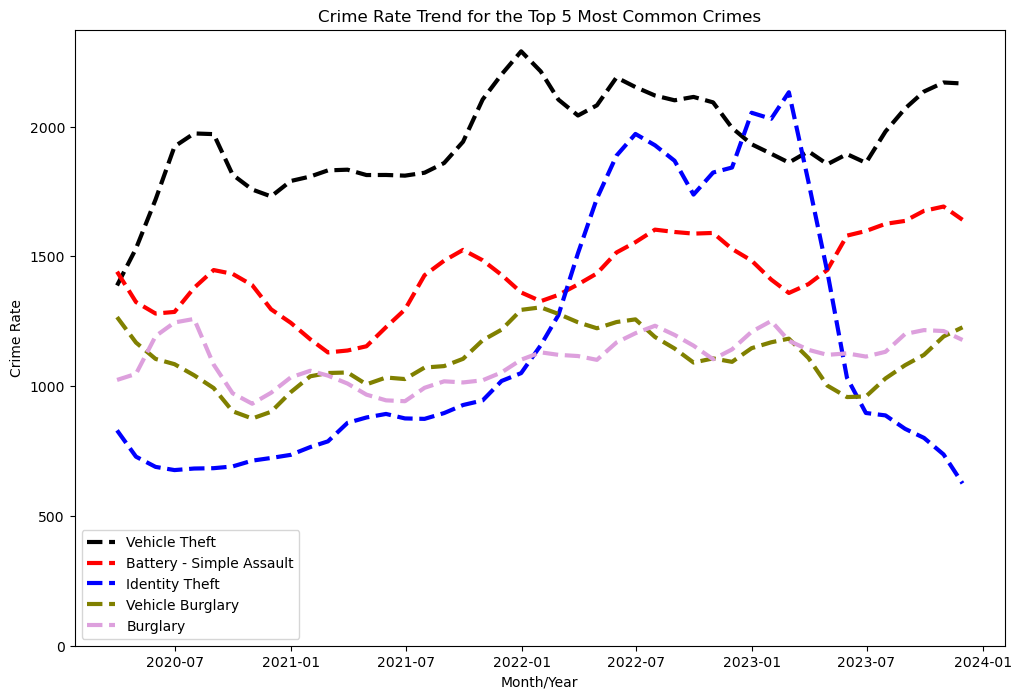

In [27]:
code_510 = time_series_plotter(la_crime_filtered, 'crime_code', 510)
code_624 = time_series_plotter(la_crime_filtered, 'crime_code', 624)
code_354 = time_series_plotter(la_crime_filtered, 'crime_code', 354)
code_330 = time_series_plotter(la_crime_filtered, 'crime_code', 330)
code_310 = time_series_plotter(la_crime_filtered, 'crime_code', 310)
code_740 = time_series_plotter(la_crime_filtered, 'crime_code', 740)

plt.figure(figsize = (12, 8))

plt.plot(code_510, label = 'Vehicle Theft', linewidth = 3, color = 'black', linestyle = 'dashed')
plt.plot(code_624, label = 'Battery - Simple Assault', linewidth = 3, color = 'red', linestyle = 'dashed')
plt.plot(code_354, label = 'Identity Theft', linewidth = 3, color = 'blue', linestyle = 'dashed')
plt.plot(code_330, label = 'Vehicle Burglary', linewidth = 3, color = 'olive', linestyle = 'dashed')
plt.plot(code_310, label = 'Burglary', linewidth = 3, color = 'plum', linestyle = 'dashed')

plt.title('Crime Rate Trend for the Top 5 Most Common Crimes')
plt.ylabel('Crime Rate')
plt.xlabel('Month/Year')
plt.legend()
plt.ylim(0)
plt.show()

### 2.  What month has the most incidents of crime, least incidents, how might this vary by area, and victim demographics?
* Importance: Findings could be utilized to increase awareness/patrols in areas where there are higher incidents of a specific crime.

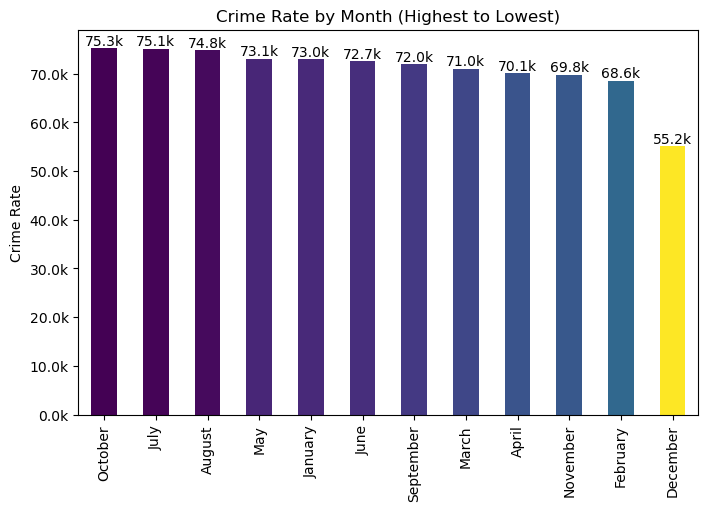

In [28]:
# Create a bar plot to show crime rates for each month ordered from highest to lowest
monthly_crime_rate = la_crime['month_name'].value_counts().iloc[:12]
months_normalized = plt.Normalize(monthly_crime_rate.min(), monthly_crime_rate.max())

# Create a colormap to show color gradient for easier readability
colormap = plt.cm.viridis_r
colors = colormap(months_normalized(monthly_crime_rate.values))

plt.figure(figsize = (8, 5))
ax = monthly_crime_rate.plot(kind = 'bar', color = colors)

# for i, value in enumerate(monthly_crime_rate):
    # ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Changing the number format for less clutter and easier readability to using 1K format
for i, value in enumerate(monthly_crime_rate):
    formatted_value = f'{value / 1000:.1f}k'
    ax.text(i, value + 0.1, formatted_value, ha='center', va='bottom') 


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.1f}k'))
    
plt.title('Crime Rate by Month (Highest to Lowest)')
plt.ylabel('Crime Rate')
ax.set(xlabel = None)
plt.show()

* October has the highest incidents of crime with 75.3k occurrances followed by July with 75.1k occurrences.
* December has the lowest incidents of crime with 55.2K (Note: Current dataset only includes dates up to 12/04/23)

* Compare montly crime rates by areas with the top five highest crime rate

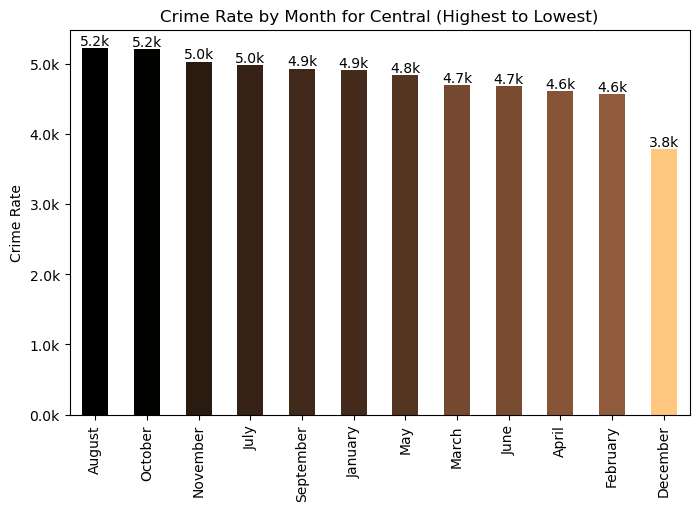

In [29]:
  
# Replace 'Your_Specific_Area' with the name of the area you want to include
specific_area = 'Central'

# Filter the DataFrame for the specific area
filtered_crime_data = la_crime[la_crime['area_name'] == specific_area]

# Calculate the monthly crime rate for the specific area
monthly_crime_rate = filtered_crime_data['month_name'].value_counts().iloc[:12]

# Normalize the values to be between 0 and 1
months_normalized = plt.Normalize(monthly_crime_rate.min(), monthly_crime_rate.max())

# Create a colormap to show color gradient for easier readability
colormap = plt.cm.copper_r
colors = colormap(months_normalized(monthly_crime_rate.values))

plt.figure(figsize=(8, 5))
ax = monthly_crime_rate.plot(kind='bar', color=colors)

# Changing the number format for less clutter and easier readability to using 1K format
for i, value in enumerate(monthly_crime_rate):
    formatted_value = f'{value / 1000:.1f}k'
    ax.text(i, value + 0.1, formatted_value, ha='center', va='bottom')

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.1f}k'))

plt.title(f'Crime Rate by Month for {specific_area} (Highest to Lowest)')
plt.ylabel('Crime Rate')
ax.set(xlabel=None)
plt.show()


In [30]:
# Create a function that displays a bar plot based on chosen variables

def bar_plot(variable_a, dataframe, column_name_1, column_name_2, plot_name, color_choice = None):
    '''
    Creates a bar chart based on a user's dataset selection, and columns selection.
    
    Args:
        a. (str) Inputing a specicific value from a column
        b. (DF) Selecting the DataFrame 
        c. (str) Selecting the first desired column in which you want to compare with the second column
        d. (str) Selecting the second column you want to compare with the first column choice
        e. (str) Selecting a descriptive word/s for the plot
        f. (str) Selecting a color scale, if none is chosen then the default is copper reversed
        
    Returns:
        A bar plot based on the columns and variables chosen. 
        
        Examples include:
        a. Comparing which months have the highest crime rate for a specicic area
        b. Which time of day has the highest crime rate for a specific age group
        c. Which day of the week has the highest crime rate for a specicif ethnic group
        
    '''
    
    
    filtered_dataframe = dataframe[dataframe[column_name_1] == variable_a]
    crime_rate = filtered_dataframe[column_name_2].value_counts().iloc[:12]
    
    normalized = plt.Normalize(crime_rate.min(), crime_rate.max())
    
    if color_choice is None:
        colormap = plt.cm.copper_r # Set the default to copper_r which is copper colormap in reverse
        
    else:
        colormap = plt.cm.get_cmap(color_choice)
        
    colors = colormap(normalized(crime_rate.values))
    
    plt.figure(figsize=(8, 5))
    ax = crime_rate.plot(kind='bar', color=colors)
    
    for i, value in enumerate(crime_rate):
        formatted_value = f'{value / 1000:.1f}k'
        ax.text(i, value + 0.1, formatted_value, ha='center', va='bottom')
        
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.1f}k'))

    plt.title(f'Monthly Crime Rate by {plot_name} for {variable_a} (Highest to Lowest)')
    plt.ylabel('Crime Rate')
    ax.set(xlabel=None)
    plt.show()

In [31]:
# Top five areas with the highest crime rate
la_crime.groupby('area_name').size().nlargest(5)

area_name
Central        57493
77th Street    53494
Pacific        49675
Southwest      47792
Hollywood      44694
dtype: int64

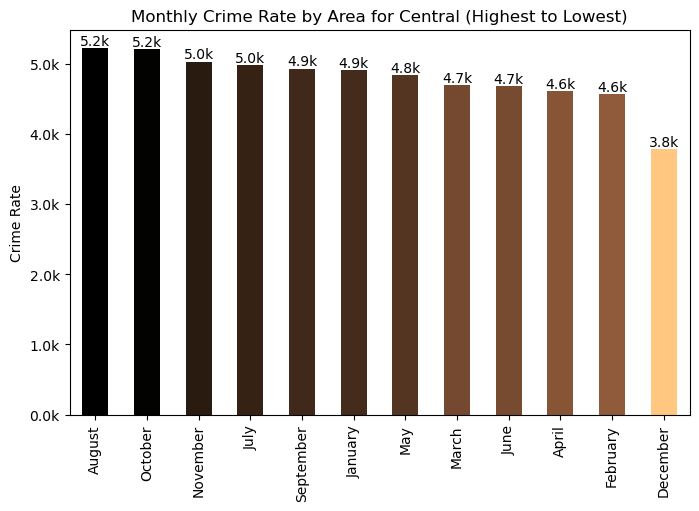

In [32]:
 # Test the function with Central area to see if it matches the bar chart above for Central
central_monthly_plot = bar_plot('Central', la_crime, 'area_name', 'month_name', 'Area', 'copper_r')
central_monthly_plot

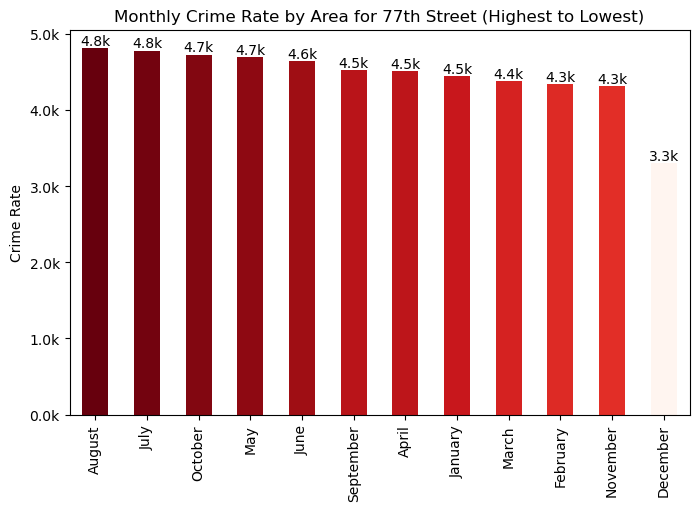

In [33]:
seventy_77th_st__monthly_plot = bar_plot('77th Street', la_crime, 'area_name', 'month_name', 'Area', 'Reds') 

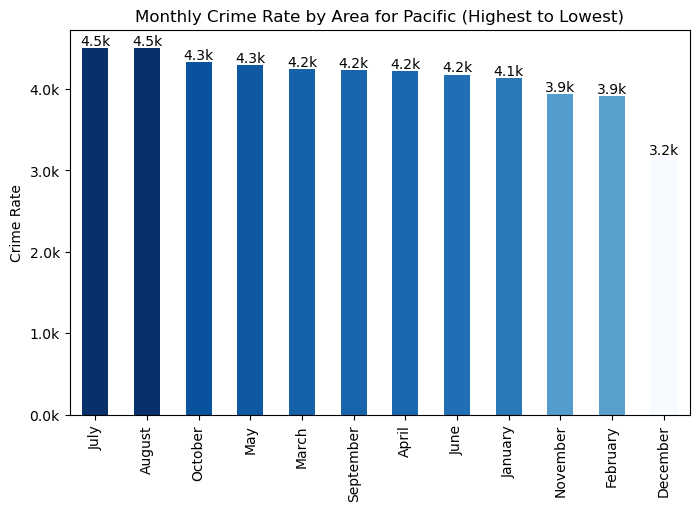

In [34]:
pacific_monthly_plot = bar_plot('Pacific', la_crime, 'area_name', 'month_name', 'Area', 'Blues') 

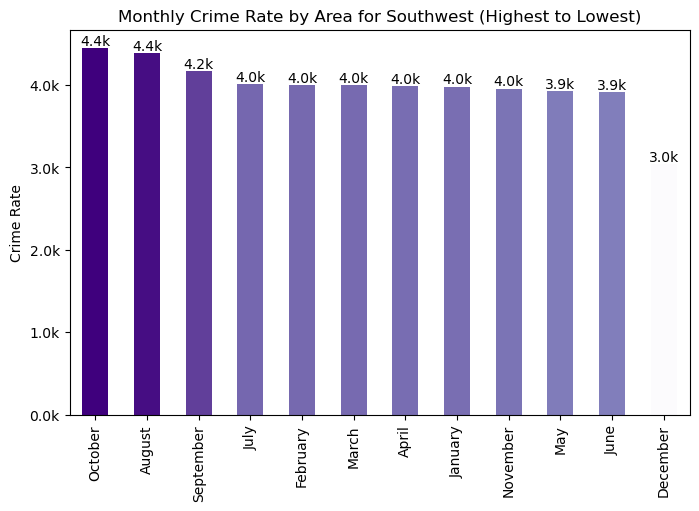

In [35]:
southwest_monthly_plot = bar_plot('Southwest', la_crime, 'area_name', 'month_name', 'Area', 'Purples') 

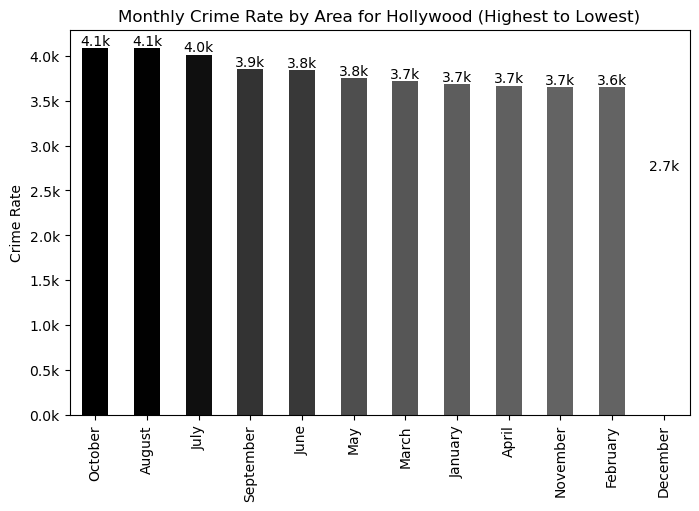

In [36]:
hollywood_monthly_plot = bar_plot('Hollywood', la_crime, 'area_name', 'month_name', 'Area', 'Greys') 

In [37]:
# Compare monthly rates for known ethnicities with the five highest crime victim counts
la_crime.groupby('ethnicity').size().nlargest(7)

ethnicity
Hispanic/Latin/Mexican    260329
Unknown                   195370
White                     173011
Black                     120561
Other                      67346
Other Asian                18671
Korean                      4570
dtype: int64

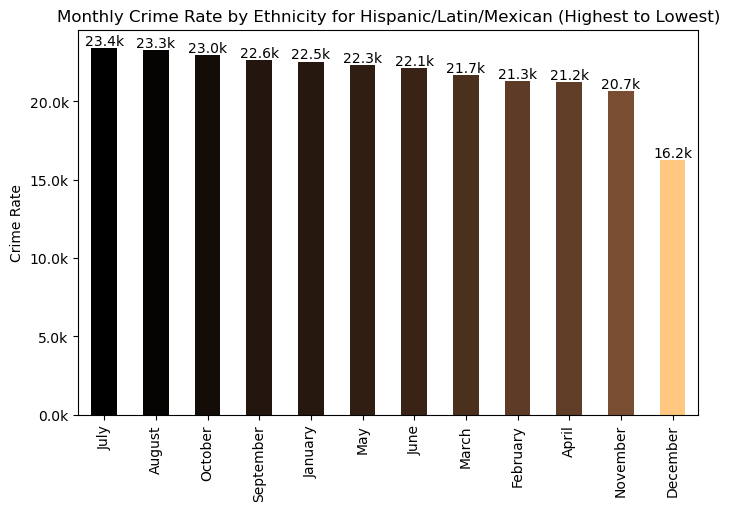

In [38]:
spanish_monthly_plot = bar_plot('Hispanic/Latin/Mexican', la_crime, 'ethnicity', 'month_name', 'Ethnicity', 'copper_r')  

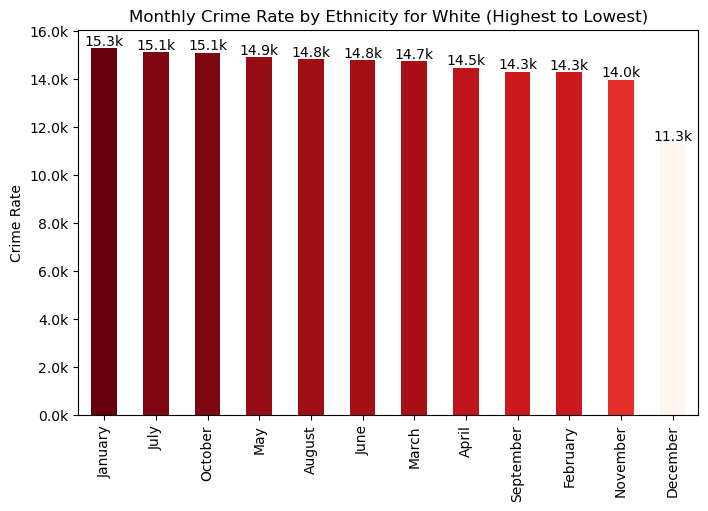

In [39]:
white_monthly_plot = bar_plot('White', la_crime, 'ethnicity', 'month_name', 'Ethnicity', 'Reds')

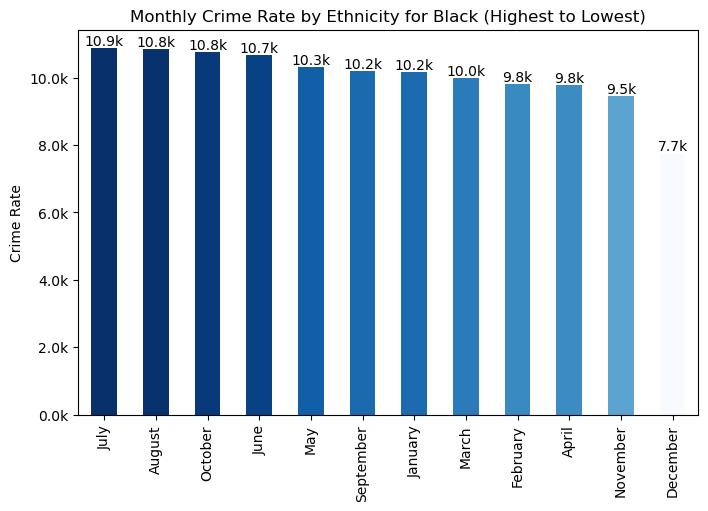

In [40]:
black_monthly_plot = bar_plot('Black', la_crime, 'ethnicity', 'month_name', 'Ethnicity', 'Blues')

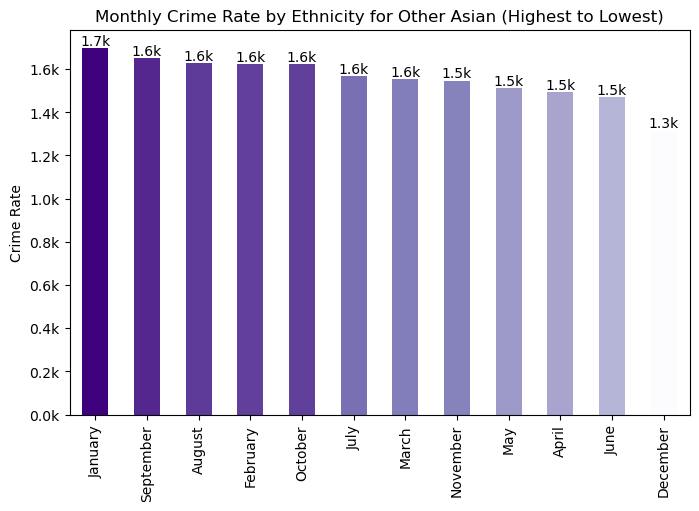

In [41]:
other_asian_monthly_plot = bar_plot('Other Asian', la_crime, 'ethnicity', 'month_name', 'Ethnicity', 'Purples')

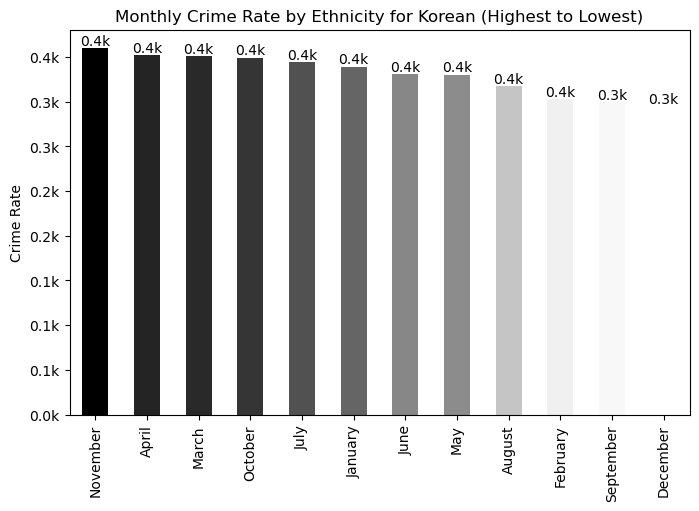

In [42]:
korean_monthly_plot = bar_plot('Korean', la_crime, 'ethnicity', 'month_name', 'Ethnicity', 'Greys')

In [43]:
# Create monthly plots for the age brackets with the five highest victim counts
la_crime.groupby('age_bracket').size().nlargest(5)

age_bracket
20-29    231982
30-39    222257
40-49    145409
50-59    108099
60-69     53908
dtype: int64

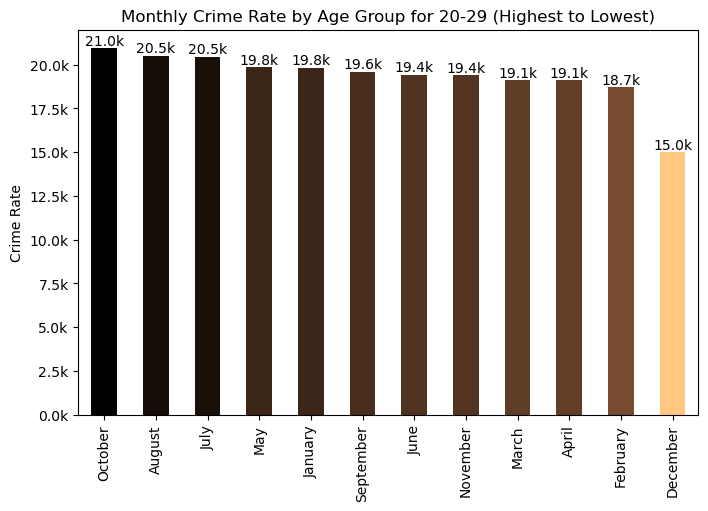

In [44]:
twenties_monthly_plot = bar_plot('20-29', la_crime, 'age_bracket', 'month_name', 'Age Group', 'copper_r')

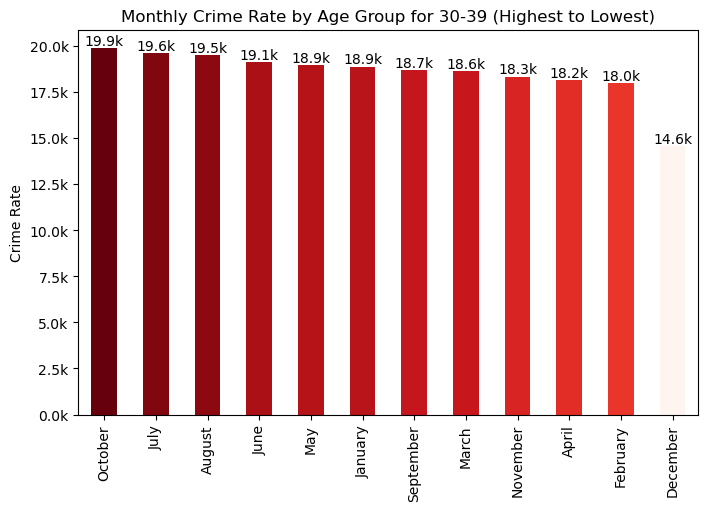

In [45]:
thirties_monthly_plot = bar_plot('30-39', la_crime, 'age_bracket', 'month_name', 'Age Group', 'Reds')

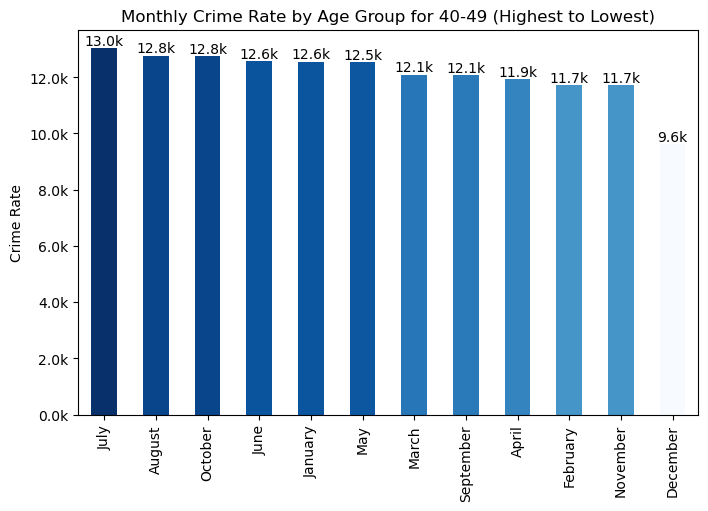

In [46]:
fourties_monthly_plot = bar_plot('40-49', la_crime, 'age_bracket', 'month_name', 'Age Group', 'Blues')

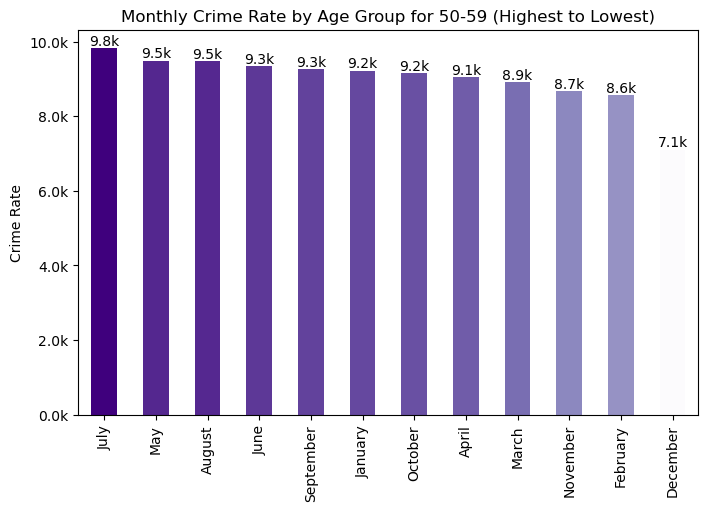

In [47]:
fifties_monthly_plot = bar_plot('50-59', la_crime, 'age_bracket', 'month_name', 'Age Group', 'Purples')

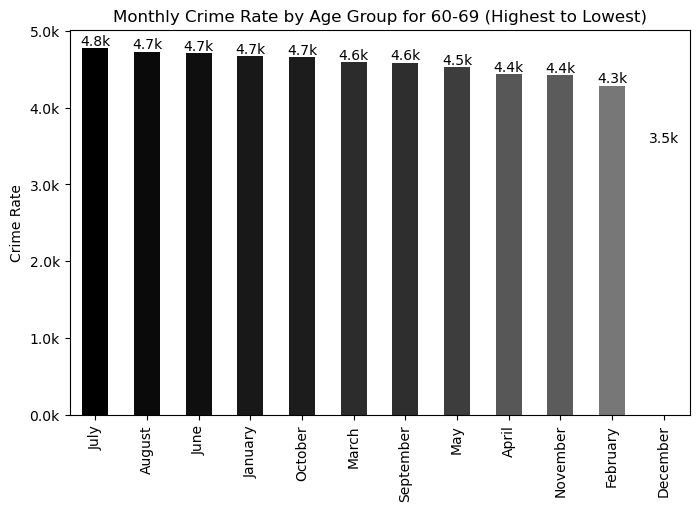

In [48]:
sixties_monthly_plot = bar_plot('60-69', la_crime, 'age_bracket', 'month_name', 'Age Group', 'Greys')

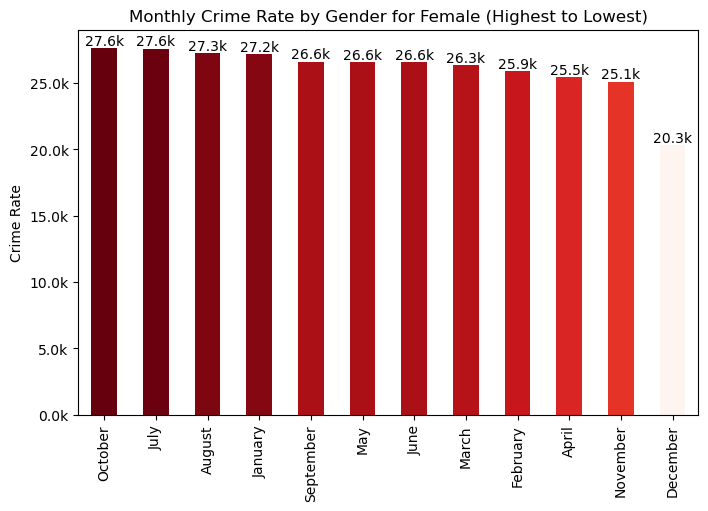

In [49]:
# Monthly crime victim trends by gender
female_monthly_plot = bar_plot('Female', la_crime, 'gender', 'month_name', 'Gender', 'Reds')

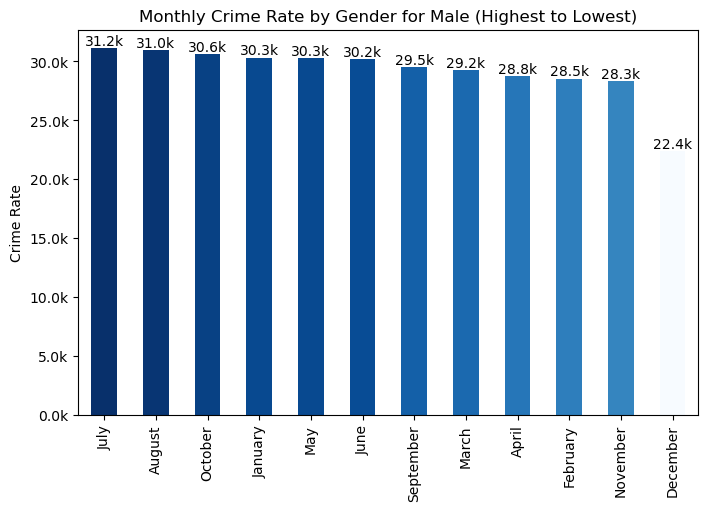

In [50]:
male_monthly_plot = bar_plot('Male', la_crime, 'gender', 'month_name', 'Gender', 'Blues')

#### Key findings:
* More males were victims of crime than females across all months. 
* For both genders July, August, and October have the highest victim count, with minor differences in order of these months by gender.
* Febuary, April, November, and December have the least victim counts for both genders with minor differences in the order of months by gender.
* Note: Data only includes up to December 4th, 2023. The month with the least amount of crimes may change once data up to the end of 2023 is included. 

## End of file